<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Input Data**

In [121]:
!pip install tensorflow==1.4
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#(1)
m = 30, a = 0.1, b = 0.4, σ = 0.05.

y=y^​+n -> y​=ax+b+n where n ~ N(0,0.05^2) 

30개의 실수 [xi,yi] 데이터 생성
그 후 xi_arr, yi_arr 배열에 각각 저장.


In [0]:
num_points = 30
vertors = []
for i in range(num_points):
  xi= np.random.normal(0.0,0.5) # random x value
  y_hat = xi*0.1 + 0.4 # y^ = 0.1*xi + 0.4
  yi= y_hat + np.random.normal(0.0, 0.05) # y=y^​+n -> y^​=ax+b+n where n ~ N(0,0.05^2)
  vertors.append([xi,yi]) # 30개의 [x,y] 데이터 생성.
xi_arr = [v[0] for v in vertors]
yi_arr = [v[1] for v in vertors]

#(2)

linear function and data_set points

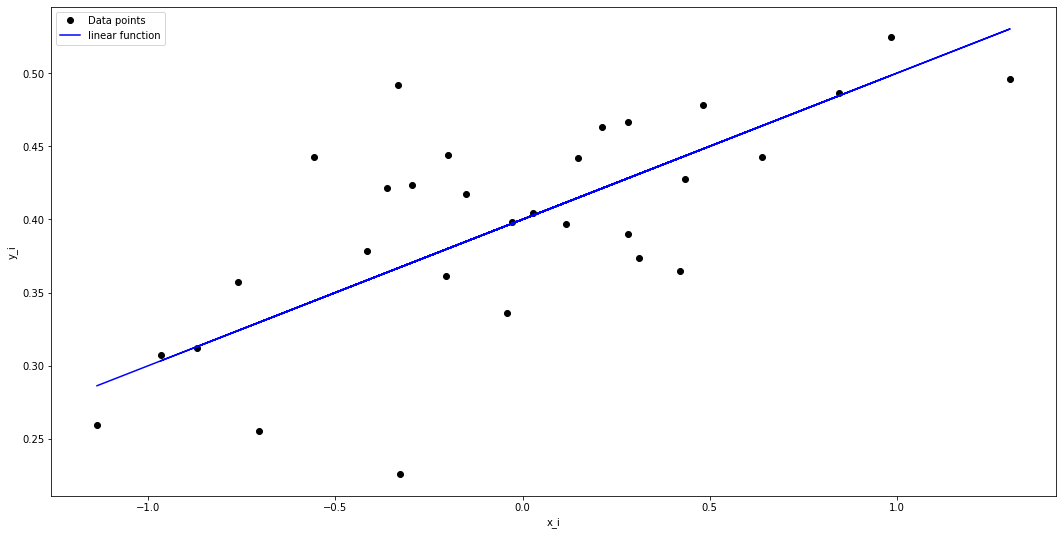

In [123]:
y = [0.1*x+0.4 for x in xi_arr]

plt.xlabel('x_i')
plt.ylabel('y_i')
plt.plot(xi_arr,yi_arr,"ko",label = "Data points")
plt.plot(xi_arr,y,color="blue",label="linear function")
plt.legend()
plt.show()

#**2. Output results**

straight line of linear function : hypothesis = W*xi_arr + b

W (= theta_1) 과 b (= theta_0) 의 초기값 설정

W = -1.5 와 1.5 사이의 실수

b = 0

OF = objective function

In [0]:
W = tf.Variable(tf.random_uniform([1],-1.5,1.5))
b=tf.Variable(tf.zeros([1]))
hypothesis=xi_arr*W+b
OF = tf.reduce_mean(tf.square(hypothesis-yi_arr))

Minimize objective function using Gradient Descent 

Set learning rate with 0.5

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(OF)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

30회 반복을 통해, solution 찾기

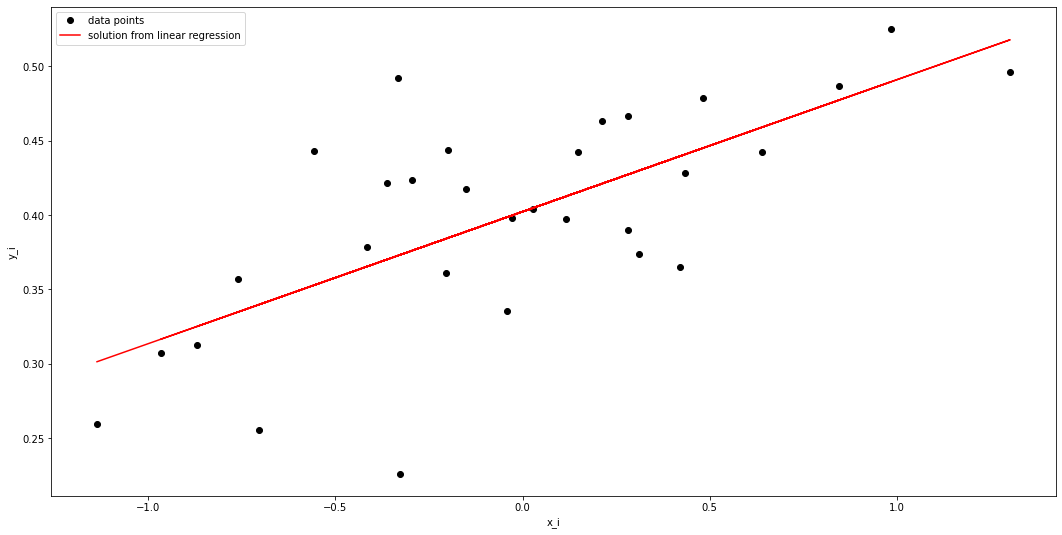

In [126]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
theta_0 = []
theta_1=[]
OF_val=[]
for step in range(30):
  sess.run(train)
  theta_1.append(sess.run(W))
  theta_0.append(sess.run(b))
  OF_val.append([sess.run(OF,feed_dict={X: xi_arr, Y: yi_arr})])
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.plot(xi_arr,yi_arr,'ko',label="data points")
plt.plot(xi_arr,sess.run(W)*xi_arr + sess.run(b),color="red",label="solution from linear regression")
plt.legend()
plt.show()

linear function 과 linear regression 을 통해 얻은 solution 비교

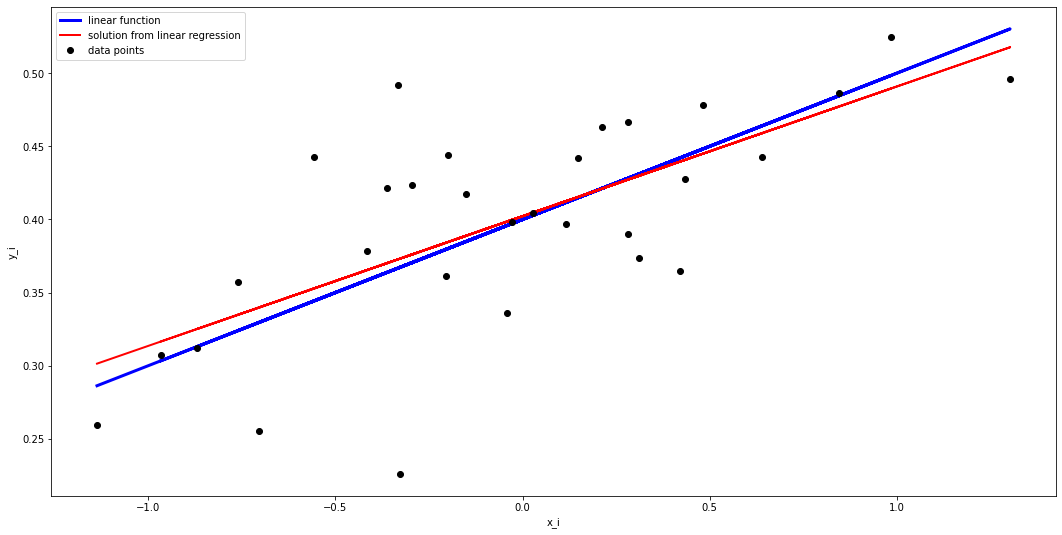

In [127]:
y=[0.1*x +0.4 for x in xi_arr]

linear_function = plt.plot(xi_arr,y,color="blue",label="linear function")
solution = plt.plot(xi_arr,sess.run(W)*xi_arr + sess.run(b),
                    color="red",label="solution from linear regression")
plt.plot(xi_arr,yi_arr,'ko',label="data points")

plt.setp(solution,linewidth=2.0)
plt.setp(linear_function,linewidth=3.0)
plt.xlabel('x_i')
plt.ylabel('y_i')

plt.legend()
plt.show()

#**3.Plotting the energy values**

(1) the value of the objective function at every optimization step by the gradient descent algorithm

목적함수의 값은 초기값 0.093에서 0에 가까이 수렴한다.

step objective values
0 [0.0939194]
1 [0.044278342]
2 [0.021694127]
3 [0.011419369]
4 [0.006744836]
5 [0.0046181437]
6 [0.003650599]
7 [0.0032104105]
8 [0.0030101463]
9 [0.0029190355]
10 [0.0028775844]
11 [0.0028587256]
12 [0.002850146]
13 [0.0028462433]
14 [0.0028444668]
15 [0.0028436591]
16 [0.0028432913]
17 [0.002843124]
18 [0.0028430482]
19 [0.0028430137]
20 [0.0028429977]
21 [0.0028429904]
22 [0.0028429874]
23 [0.0028429856]
24 [0.0028429846]
25 [0.002842985]
26 [0.0028429849]
27 [0.0028429846]
28 [0.0028429844]
29 [0.0028429849]



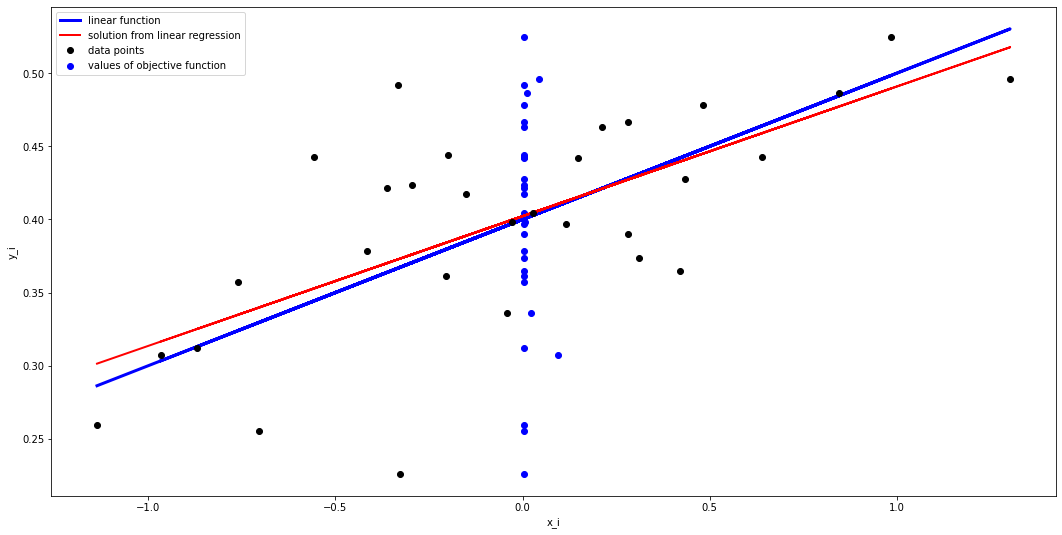

In [128]:
print("step objective values")

y=[0.1*x +0.4 for x in xi_arr]

linear_function = plt.plot(xi_arr,y,color="blue",label="linear function")
solution = plt.plot(xi_arr,sess.run(W)*xi_arr + sess.run(b),
                    color="red",label="solution from linear regression")
plt.plot(xi_arr,yi_arr,'ko',label="data points")

plt.setp(solution,linewidth=2.0)
plt.setp(linear_function,linewidth=3.0)
plt.xlabel('x_i')
plt.ylabel('y_i')

for step in range(30):
  print(step, OF_val[step])
print()
plt.scatter(OF_val,yi_arr,color="blue",label="values of objective function")

plt.rcParams['figure.figsize'] = [18, 9]
plt.legend()
plt.show()

#**4.Plotting the model parameters**

(1) the value of the model parameters θ0\theta_0θ0​ and θ1\theta_1θ1​ at every optimization step

theta_0 : 초기값 0.425 에서 0.4 로 수렴한다.

theta_1 : 초기값 0.617 에서 0.1 로 수렴한다.

step theta_0    theta_1

0 [0.42505276] [0.617136]
1 [0.41726688] [0.4451338]
2 [0.41236928] [0.32910305]
3 [0.40906543] [0.25084007]
4 [0.40683696] [0.19805154]
5 [0.40533385] [0.16244556]
6 [0.40432] [0.13842925]
7 [0.40363616] [0.12223021]
8 [0.4031749] [0.11130393]
9 [0.4028638] [0.10393412]
10 [0.40265396] [0.09896318]
11 [0.4025124] [0.09561026]
12 [0.40241694] [0.09334871]
13 [0.40235254] [0.09182329]
14 [0.40230912] [0.09079439]
15 [0.40227982] [0.0901004]
16 [0.40226007] [0.0896323]
17 [0.4022467] [0.08931657]
18 [0.40223774] [0.0891036]
19 [0.40223166] [0.08895995]
20 [0.40222758] [0.08886307]
21 [0.4022248] [0.08879772]
22 [0.40222296] [0.08875364]
23 [0.4022217] [0.08872391]
24 [0.40222088] [0.08870386]
25 [0.40222028] [0.08869033]
26 [0.4022199] [0.08868121]
27 [0.40221965] [0.08867505]
28 [0.40221947] [0.0886709]
29 [0.40221936] [0.0886681]


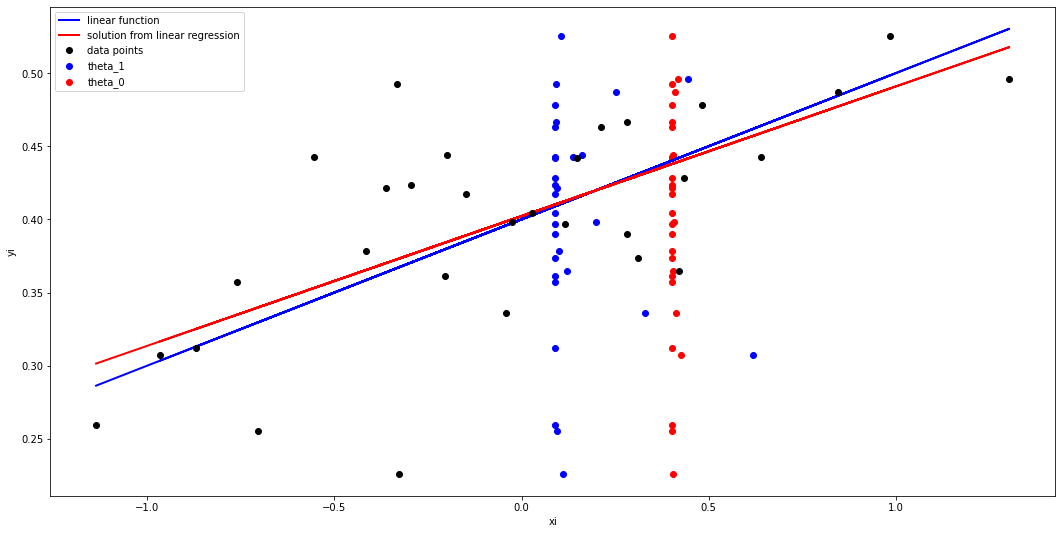

In [129]:
y=[0.1*x +0.4 for x in xi_arr]

linear_function = plt.plot(xi_arr,y,color="blue",label="linear function")
solution = plt.plot(xi_arr,sess.run(W)*xi_arr + sess.run(b),color="red",label="solution from linear regression")
plt.plot(xi_arr,yi_arr,'ko',label="data points")

plt.setp(solution,linewidth=2.0)
plt.setp(linear_function,linewidth=2.0)

print("step theta_0    theta_1")
print()
for step in range(30):
  print(step, theta_0[step],theta_1[step])
plt.scatter(theta_1,yi_arr,color="blue",label="theta_1")
plt.scatter(theta_0,yi_arr,color="red",label="theta_0")
plt.xlabel('xi')
plt.ylabel('yi')

plt.rcParams['figure.figsize'] = [18, 9]
plt.legend()
plt.show()

# **Final Result**

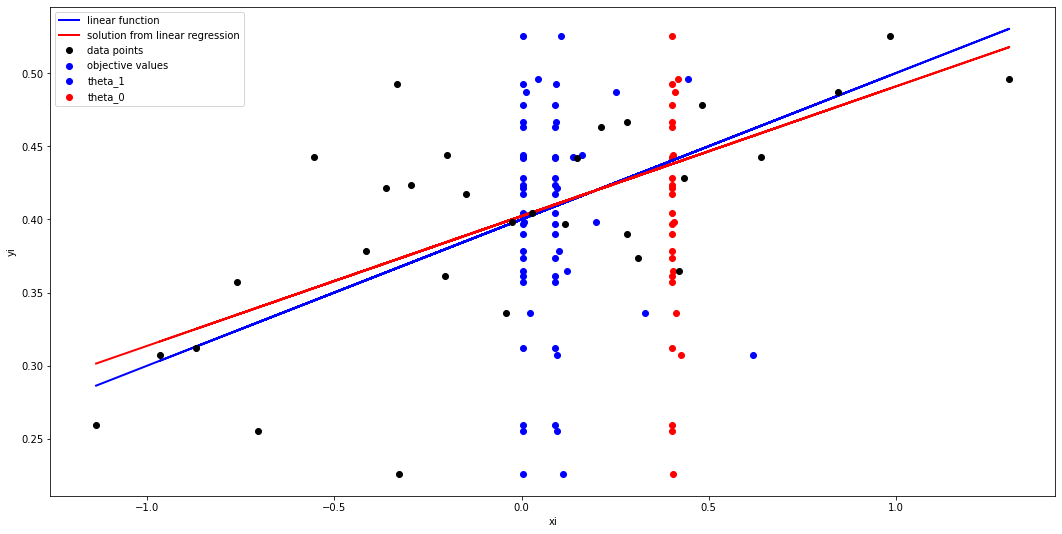

In [130]:
y=[0.1*x +0.4 for x in xi_arr]

linear_function = plt.plot(xi_arr,y,color="blue",label="linear function")
solution = plt.plot(xi_arr,sess.run(W)*xi_arr + sess.run(b),color="red",label="solution from linear regression")
plt.plot(xi_arr,yi_arr,'ko',label="data points")

plt.setp(solution,linewidth=2.0)
plt.setp(linear_function,linewidth=2.0)

plt.scatter(OF_val,yi_arr,color="blue",label="objective values")

plt.scatter(theta_1,yi_arr,color="blue",label="theta_1")
plt.scatter(theta_0,yi_arr,color="red",label="theta_0")
plt.xlabel('xi')
plt.ylabel('yi')

plt.rcParams['figure.figsize'] = [18, 9]
plt.legend()
plt.show()